# 부록) 케라스를 이용한 딥러닝 기초 (CNN)

* 싸이그래머 / 어바웃 파이썬
* 김무성

# 차례
* CNN
* 케라스로 CNN 구현
* 케라스를 이용한 손글씨 영상 분류 (CNN)
* Transfer Learning with CNNs
* Visualization
* Attention
* CNN Architectures

# CNN

#### 참고
* [1] (slide) Lecture 5: Convolutional Neural Networks (Stanford cs231n)  - http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture5.pdf
* [2] (video) Lecture 5: Convolutional Neural Networks (Stanford cs231n)  - https://www.youtube.com/watch?v=bNb2fEVKeEo&list=PL3FW7Lu3i5JvHM8ljYj-zLfQRF3EO8sYv
* [3] (lecture note) (slide) Lecture 5: Convolutional Neural Networks (Stanford cs231n) - http://cs231n.github.io/convolutional-networks/

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" width=600/>

<img src="http://cs231n.github.io/assets/cnn/cnn.jpeg" />

<img src="http://cs231n.github.io/assets/cnn/convnet.jpeg" width=600 />

---------------------------

# 케라스로 CNN 구현
* 필터로 특징을 뽑아주는 컨볼루션(Convolution) 레이어
* 사소한 변화를 무시해주는 맥스풀링(Max Pooling) 레이어
* 영상을 일차원으로 바꿔주는 플래튼(Flatten) 레이어
* 구현

#### 참고
* [4] 컨볼루션 신경망 레이어 이야기 - https://tykimos.github.io/2017/01/27/CNN_Layer_Talk/
* [5] 컨볼루션 신경망 모델 만들어보기 - https://tykimos.github.io/2017/03/08/CNN_Getting_Started/
* [6] 컨볼루션 신경망 모델을 위한 데이터 부풀리기 - https://tykimos.github.io/2017/06/10/CNN_Data_Augmentation/

## 필터로 특징을 뽑아주는 컨볼루션(Convolution) 레이어
* 주요 인자들
* 가중치의 수
* 경계 처리 방법
* 필터 수

### 주요 인자들

```python
Conv2D(32, (5, 5), padding='valid', input_shape=(28, 28, 1), activation='relu')
```

* 첫번째 인자 : 컨볼루션 필터의 수 입니다.
* 두번째 인자 : 컨볼루션 커널의 (행, 열) 입니다.
* padding : 경계 처리 방법을 정의합니다.
    - ‘valid’ : 유효한 영역만 출력이 됩니다. 따라서 출력 이미지 사이즈는 입력 사이즈보다 작습니다.
    - ‘same’ : 출력 이미지 사이즈가 입력 이미지 사이즈와 동일합니다.
* input_shape : 샘플 수를 제외한 입력 형태를 정의 합니다. 모델에서 첫 레이어일 때만 정의하면 됩니다.
    - (행, 열, 채널 수)로 정의합니다. 흑백영상인 경우에는 채널이 1이고, 컬러(RGB)영상인 경우에는 채널을 3으로 설정합니다.
* activation : 활성화 함수 설정합니다.
    - ‘linear’ : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옵니다.
    - ‘relu’ : rectifier 함수, 은익층에 주로 쓰입니다.
    - ‘sigmoid’ : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰입니다.
    - ‘softmax’ : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰입니다.

입력 형태는 다음과 같습니다.
* image_data_format이 ‘channels_first’인 경우 (샘플 수, 채널 수, 행, 열)로 이루어진 4D 텐서입니다.
* image_data_format이 ‘channels_last’인 경우 (샘플 수, 행, 열, 채널 수)로 이루어진 4D 텐서입니다.

image_data_format 옵션은 “keras.json” 파일 안에 있는 설정입니다. 콘솔에서 “vi ~/.keras/keras.json”으로 keras.json 파일 내용을 변경할 수 있습니다.

출력 형태는 다음과 같습니다.
* image_data_format이 ‘channels_first’인 경우 (샘플 수, 필터 수, 행, 열)로 이루어진 4D 텐서입니다.
* image_data_format이 ‘channels_last’인 경우 (샘플 수, 행, 열, 필터 수)로 이루어진 4D 텐서입니다.

행과 열의 크기는 padding가 ‘same’인 경우에는 입력 형태의 행과 열의 크기가 동일합니다.

##### 간단한 예제
* 컨볼루션 레이어와 필터. 
* 입력 이미지는 채널 수가 1, 너비가 3 픽셀, 높이가 3 픽셀이고, 크기가 2 x 2인 필터가 하나인 경우를 레이어로 표시하면 다음과 같다.
* 단 image_data_format이 ‘channels_last’인 경우.

```python
Conv2D(1, (2, 2), padding='valid', input_shape=(3, 3, 1))
```

<img src="http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_1.png" />

### 가중치의 수

* Dense 레이어와 컨볼루션 레이어와 비교를 해보면서 차이점을 알아보기.
* 영상도 결국에는 픽셀의 집합이므로 입력 뉴런이 9개 (3 x 3)이고, 출력 뉴런이 4개 (2 x 2)인 Dense 레이어로 표현할 수 있다.

```python
Dense(4, input_dim=9))
```

<img src="http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_2.png" />

컨볼루션 레이어에서는 가중치 4개로 구성된 크기가 2 x 2인 필터를 적용하였을 때의 뉴런 상세 구조는 다음과 같댜.

<img src="http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_3.png" />

### 경계 처리 방법
* 컨볼루션 레이어 설정 옵션에는 border_mode가 있다.
    - ‘valid’와 ‘same’으로 설정할 수 있음.
    - ‘valid’인 경우에는 입력 이미지 영역에 맞게 필터를 적용하기 때문에 출력 이미지 크기가 입력 이미지 크기보다 작아진다. 
    - 반면에 ‘same’은 출력 이미지와 입력 이미지 사이즈가 동일하도록 입력 이미지 경계에 빈 영역을 추가하여 필터를 적용. ‘same’으로 설정 시, 입력 이미지에 경계를 학습시키는 효과가 있다.

<img src="http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_4.png" />

### 필터 수
* 필터의 개수에 대해서 알아보기.

입력 이미지가 단채널의 3 x 3이고, 2 x 2인 필터가 하나 있다면 다음과 같이 컨볼루션 레이어를 정의할 수 있다.

```python
Conv2D(1, (2, 2), padding='same', input_shape=(3, 3, 1))
```

<img src="http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_5.png" />

만약 여기서 사이즈가 2 x 2 필터를 3개 사용한다면 다음과 같이 정의할 수 있다.

```python
Conv2D(3, (2, 2), padding='same', input_shape=(3, 3, 1))
```

<img src="http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_6.png" />

뒤에서 각 레이어를 레고처럼 쌓아올리기 위해서 약식으로 표현하면 다음과 같다.

<img src="http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_7.png" />

위의 표현은 다음을 의미.
* 입력 이미지 사이즈가 3 x 3 
* 2 x 2 커널을 가진 필터가 3개. 가중치는 총 12개.
* 출력 이미지 사이즈가 3 x 3이고 총 3개. 이는 채널이 3개다라고도 표현.

## 사소한 변화를 무시해주는 맥스풀링(Max Pooling) 레이어

```python
MaxPooling2D(pool_size=(2, 2))
```

* 컨볼루션 레이어의 출력 이미지에서 주요값만 뽑아 크기가 작은 출력 영상을 만든다.
* 이것은 지역적인 사소한 변화가 영향을 미치지 않도록 한다.
* 주요 인자는 다음과 같다.
    - pool_size : 수직, 수평 축소 비율을 지정. (2, 2)이면 출력 영상 크기는 입력 영상 크기의 반으로 줄어든다.

<img src="http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_12.png" />

<img src="http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_13.png" />

## 영상을 일차원으로 바꿔주는 플래튼(Flatten) 레이어

* CNN에서 컨볼루션 레이어나 맥스풀링 레이어를 반복적으로 거치면 주요 특징만 추출되고, 추출된 주요 특징은 전결합층에 전달되어 학습된다. 
* 컨볼루션 레이어나 맥스풀링 레이어는 주로 2차원 자료를 다루지만 전결합층에 전달하기 위해선 1차원 자료로 바꿔줘야 한다.
* 이 때 사용되는 것이 플래튼 레이어. 사용 예시는 다음과 같다.

```python
Flatten()
```

* 이전 레이어의 출력 정보를 이용하여 입력 정보를 자동으로 설정되며, 
* 출력 형태는 입력 형태에 따라 자동으로 계산되기 때문에 별도로 사용자가 파라미터를 지정해주지 않아도 된다. 

크기가 3 x 3인 영상을 1차원으로 변경했을 때는 도식화하면 다음과 같다.

<img src="http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_14.png" />

## 구현

* 손으로 삼각형, 사각형, 원을 손으로 그린 이미지가 있고 이미지 크기가 8 x 8이라고 가정. 
* 삼각형, 사각형, 원을 구분하는 3개의 클래스를 분류하는 문제(=출력 벡터는 3개).

<img src="http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_22.png" />

<img src="http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_23.png" />

In [4]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [5]:
model = Sequential()

# 컨볼루션 레이어 : 
#  - 입력 이미지 크기 8 x 8, 입력 이미지 채널 1개, 필터 크기 3 x 3, 
#  - 필터 수 2개, 경계 타입 ‘same’, 활성화 함수 ‘relu’
model.add(Conv2D(2, (3, 3), padding='same', activation='relu', input_shape=(8, 8, 1)))

# 맥스풀링 레이어 : 풀 크기 2 x 2
model.add(MaxPooling2D(pool_size=(2, 2)))

# 컨볼루션 레이어 : 
#  - 입력 이미지 크기 4 x 4, 입력 이미지 채널 2개, 
#  - 필터 크기 2 x 2, 필터 수 3개, 
#  - 경계 타입 ‘same’, 활성화 함수 ‘relu’
model.add(Conv2D(3, (2, 2), padding='same', activation='relu'))

# 맥스풀링 레이어 : 풀 크기 2 x 2
model.add(MaxPooling2D(pool_size=(2, 2)))

# 플래튼 레이어
model.add(Flatten())

# 댄스 레이어 : 입력 뉴런 수 12개, 출력 뉴런 수 8개, 활성화 함수 ‘relu’
model.add(Dense(8, activation='relu'))

# 댄스 레이어 : 입력 뉴런 수 8개, 출력 뉴런 수 3개, 활성화 함수 ‘softmax’
model.add(Dense(3, activation='softmax'))

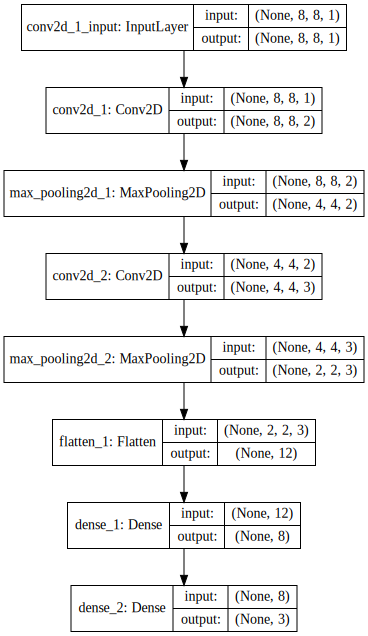

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

------------------------------

# 케라스를 이용한 손글씨 영상 분류 (CNN)
* 문제 정의하기
* 데이터 준비하기
* 데이터셋 생성하기
* 모델 구성하기
* 모델 학습과정 설정하기
* 모델 학습시키기
* 모델 평가하기

#### 참고
* [7] 코딩셰프의 3분 딥러닝, 케라스맛 / 예제 4-1 필기체를 분류하는 CNN - https://github.com/jskDr/keraspp/blob/master/ex4_1_cnn_mnist_cl.py

<img src="http://corochann.com/wp-content/uploads/2017/02/mnist_plot.png" width=600 />

#### 문제 정의하기

In [ ]:
# -- coding

#### 데이터 준비하기

In [ ]:
# -- coding

#### 데이터셋 생성하기

In [ ]:
# -- coding

#### 모델 구성하기

In [ ]:
# -- coding

#### 모델 학습과정 설정하기

In [ ]:
# -- coding

#### 모델 학습시키기

In [ ]:
# -- coding

#### 모델 평가하기

In [ ]:
# -- coding

# Transfer Learning with CNNs

#### 참고
* [8] (slide) Lecture 7: Training Neural Networks,Part 2 (Stanford cs231n) - http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture7.pdf

In [ ]:
# -- 업데이트 예정

# Visualization

#### 참고
* [9] (slide) Lecture 12: Visualizing and Understanding (Stanford cs231n) - http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture12.pdf

In [ ]:
# -- 업데이트 예정

# Attention

#### 참고
* [10] (slide) Lecture 10: Recurrent Neural Networks (Stanford cs231n) - http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture10.pdf

In [ ]:
# -- 업데이트 예정

# CNN Architectures

#### 참고
* [11] (slide) Lecture 9: CNN Architectures (Stanford cs231n) - http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture9.pdf

In [ ]:
# -- 업데이트 예정

# 참고자료 
* [1] (slide) Lecture 5: Convolutional Neural Networks (Stanford cs231n) - http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture5.pdf
* [2] (video) Lecture 5: Convolutional Neural Networks (Stanford cs231n) - https://www.youtube.com/watch?v=bNb2fEVKeEo&list=PL3FW7Lu3i5JvHM8ljYj-zLfQRF3EO8sYv
* [3] (lecture note) (slide) Lecture 5: Convolutional Neural Networks (Stanford cs231n) - http://cs231n.github.io/convolutional-networks/
* [4] 컨볼루션 신경망 레이어 이야기 - https://tykimos.github.io/2017/01/27/CNN_Layer_Talk/
* [5] 컨볼루션 신경망 모델 만들어보기 - https://tykimos.github.io/2017/03/08/CNN_Getting_Started/
* [6] 컨볼루션 신경망 모델을 위한 데이터 부풀리기 - https://tykimos.github.io/2017/06/10/CNN_Data_Augmentation/
* [7] 코딩셰프의 3분 딥러닝, 케라스맛 / 예제 4-1 필기체를 분류하는 CNN - https://github.com/jskDr/keraspp/blob/master/ex4_1_cnn_mnist_cl.py
* [8] (slide) Lecture 7: Training Neural Networks,Part 2 (Stanford cs231n) - http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture7.pdf
* [9] (slide) Lecture 12: Visualizing and Understanding (Stanford cs231n) - http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture12.pdf
* [10] (slide) Lecture 10: Recurrent Neural Networks (Stanford cs231n) - http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture10.pdf
* [11] (slide) Lecture 9: CNN Architectures (Stanford cs231n) - http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture9.pdf